<a href="https://colab.research.google.com/github/Dhanushkumar0406/SKIIRYT-AI-TRAINING-SESSION/blob/materials/Heart_failure_clinical_records_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Keras (TensorFlow backend)
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


<Axes: ylabel='count'>

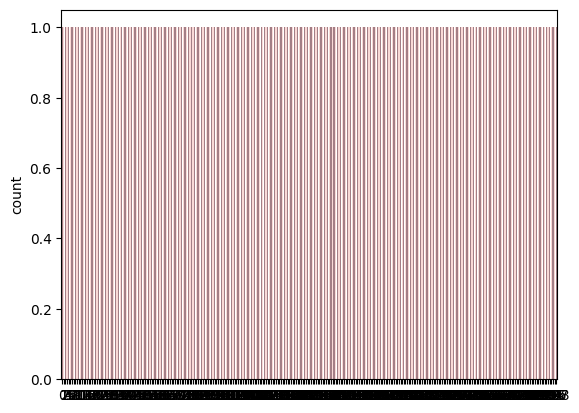

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cols = ["#a97882","#ffd4d1"]
sns.countplot(data['DEATH_EVENT'],palette=cols)

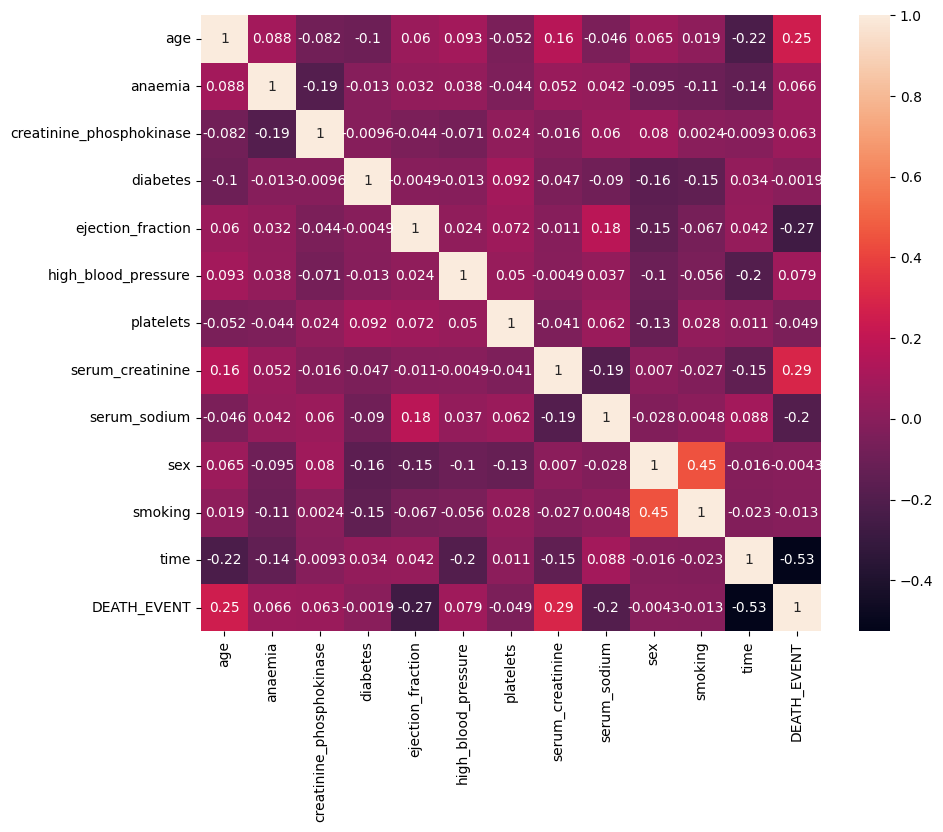

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = data.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

Text(0.5, 1.0, 'Distribution Of Age')

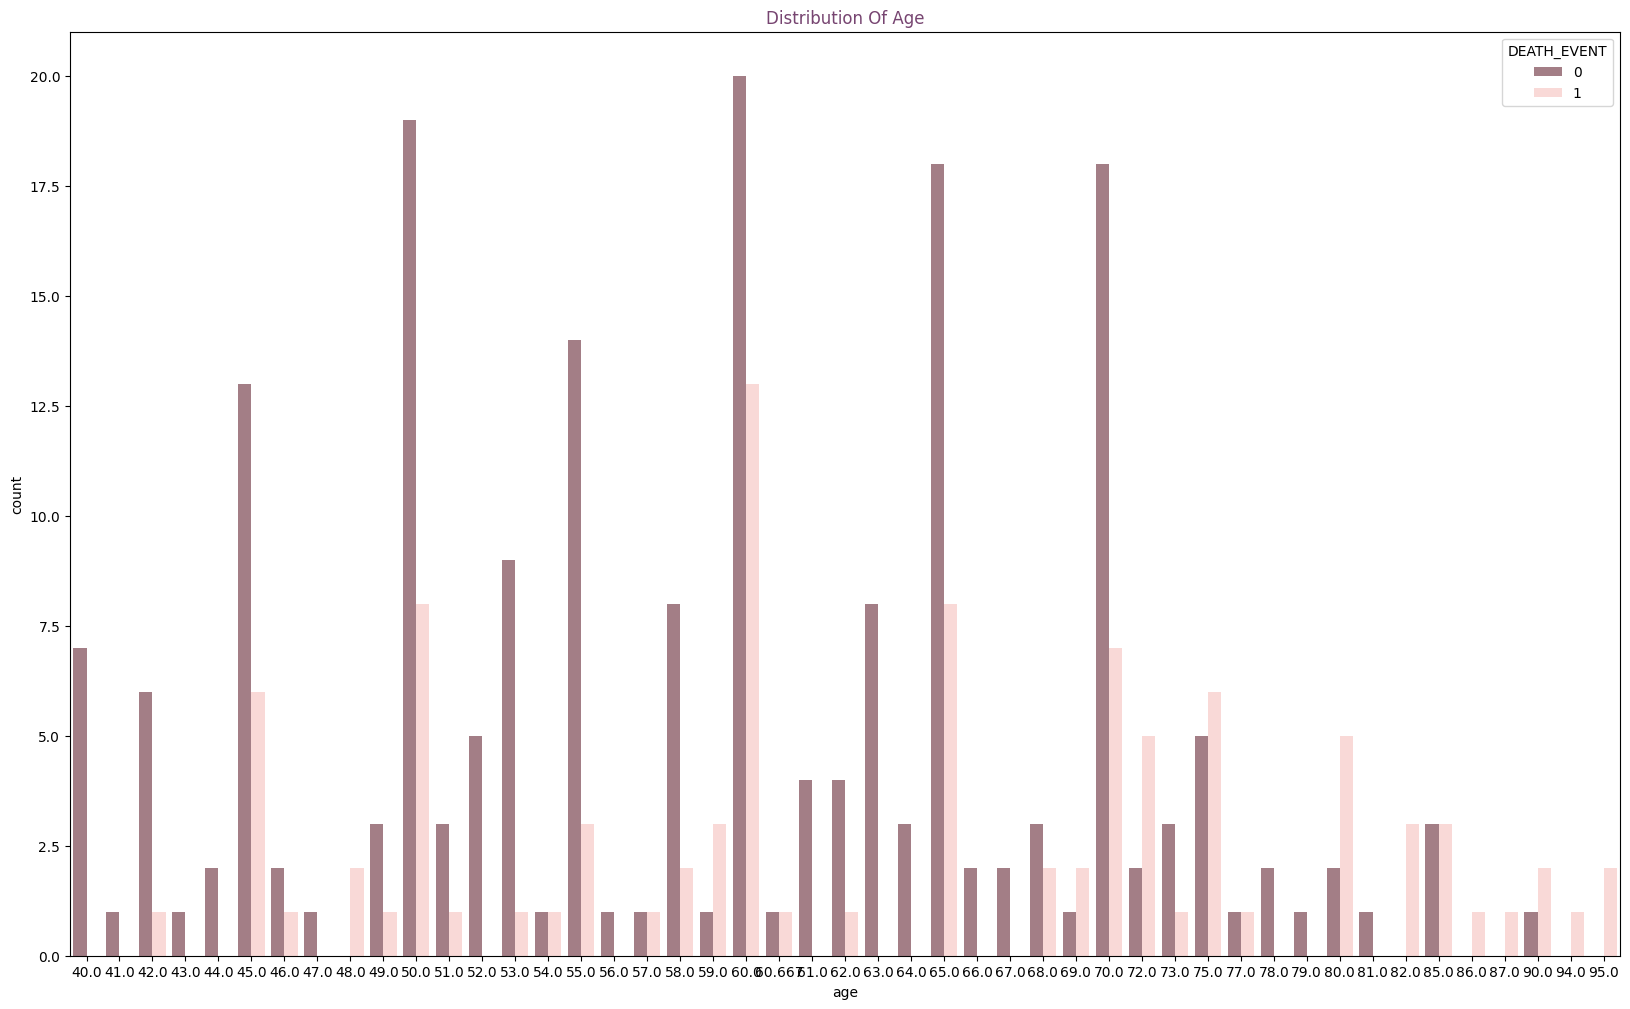

In [ ]:
#Evauating age distribution
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=data['age'], data=data, hue ="DEATH_EVENT", palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"], axis=1)
y=data["DEATH_EVENT"]

In [ ]:
from sklearn import preprocessing
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame (X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y, test_size=0.25, random_state=7)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
#ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout (0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#from keras.optimizers import SGD
#from tensorflow.keras.optimizers import SGD
model.compile(optimizer = 'adam' , loss='binary_crossentropy', metrics = ['accuracy'])
#Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.6576 - loss: 0.6929 - val_accuracy: 0.6667 - val_loss: 0.6923
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6809 - loss: 0.6920 - val_accuracy: 0.6667 - val_loss: 0.6914
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6726 - loss: 0.6912 - val_accuracy: 0.6667 - val_loss: 0.6906
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6432 - loss: 0.6908 - val_accuracy: 0.6667 - val_loss: 0.6897
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6417 - loss: 0.6901 - val_accuracy: 0.6667 - val_loss: 0.6889
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6243 - loss: 0.6898 - val_accuracy: 0.6667 - val_loss: 0.6881
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6598 - loss: 0.6882 - val_accuracy: 0.6667 - val_loss: 0.6873
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6826 - loss: 0.6865 - val_accuracy: 0.6667 - val_loss: 0.6864

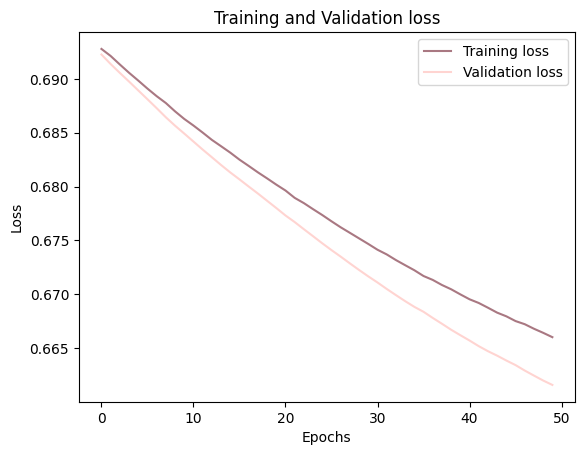

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#a97882", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#ffd4d1", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

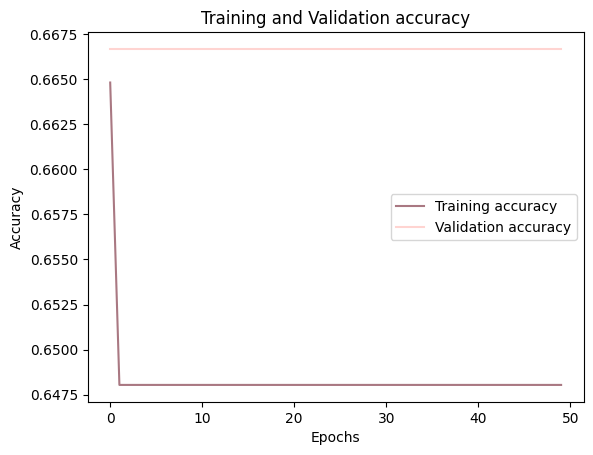

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#a97882", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#ffd4d1", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
#np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


In [ ]:
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[57,  0],
       [18,  0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        57
           1       0.00      0.00      0.00        18

    accuracy                           0.76        75
   macro avg       0.38      0.50      0.43        75
weighted avg       0.58      0.76      0.66        75



CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Normalize
X_train, X_test=X_train/255.0, X_test/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

Text(0.5, 1.0, '[8]')

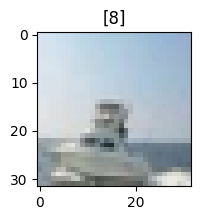

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[100])
plt.title(y_train[100])

In [ ]:
obj_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

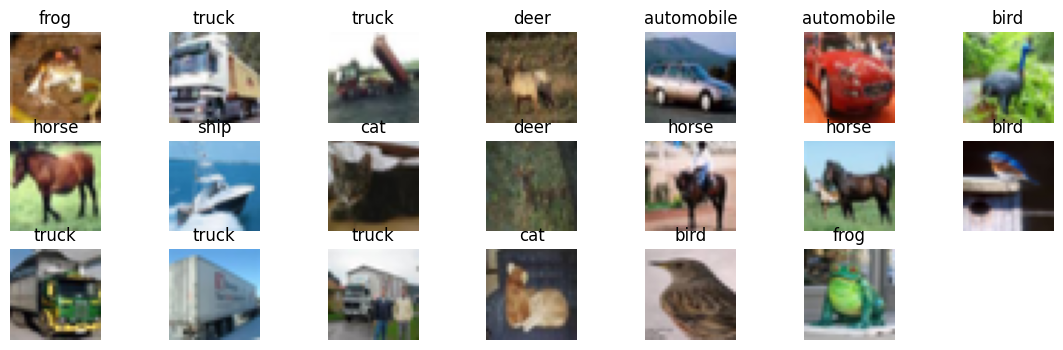

In [ ]:
plt.figure(figsize=(14,4))
for i in range(20):
    plt.subplot(3,7,i+1)
    plt.imshow(X_train[i])
    plt.title(obj_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
model= models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                          layers.MaxPool2D((2,2)),
                          layers.Conv2D(64,(3,3),activation='relu'),
                          layers.MaxPool2D((2,2)),
                          layers.Conv2D(64,(3,3),activation='relu'),
                          layers.Flatten(),
                          layers.Dense(64,activation='relu'),
                          layers.Dense(10,activation='softmax')
                          ])

In [ ]:
## compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train, y_train_cat, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3439 - loss: 1.7717
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5698 - loss: 1.2158
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6373 - loss: 1.0318
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6761 - loss: 0.9188
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7079 - loss: 0.8266
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7275 - loss: 0.7724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7551 - loss: 0.7010
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7679 - loss: 0.6663
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7819 - loss: 0.6244
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7919 - loss: 0.5910


In [ ]:
model.evaluate(X_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7193 - loss: 0.8463


[0.8437828421592712, 0.7203999757766724]

In [ ]:
y_pred=model.predict(X_test)
y_pred1=y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
## accuracy
y_true=y_test.flatten()
confusion_matrix(y_pred1, y_test)

array([[760,  19,  74,  20,  19,  19,   8,  25,  47,  31],
       [ 28, 868,   8,   5,   4,   1,   8,   4,  40, 103],
       [ 35,   7, 601,  65,  55,  45,  44,  30,  12,   8],
       [ 22,   8,  82, 595,  97, 205, 103,  52,  15,  18],
       [  9,   5,  74,  59, 679,  33,  32,  73,   5,   5],
       [  3,   8,  58, 144,  48, 627,  30,  70,   8,  11],
       [  9,   7,  56,  53,  31,  16, 751,   4,   6,   7],
       [  7,   5,  18,  19,  44,  39,   6, 711,   4,  14],
       [ 94,  27,  22,  18,  17,   9,  12,   3, 846,  37],
       [ 33,  46,   7,  22,   6,   6,   6,  28,  17, 766]])

In [ ]:
obj_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(50):
    print('Actual:', obj_names[y_true[i]],'Predicted:',obj_names[y_pred1[i]])

Actual: cat Predicted: cat
Actual: ship Predicted: ship
Actual: ship Predicted: ship
Actual: airplane Predicted: airplane
Actual: frog Predicted: deer
Actual: frog Predicted: frog
Actual: automobile Predicted: cat
Actual: frog Predicted: frog
Actual: cat Predicted: cat
Actual: automobile Predicted: automobile
Actual: airplane Predicted: airplane
Actual: truck Predicted: truck
Actual: dog Predicted: dog
Actual: horse Predicted: horse
Actual: truck Predicted: truck
Actual: ship Predicted: ship
Actual: dog Predicted: dog
Actual: horse Predicted: cat
Actual: ship Predicted: ship
Actual: frog Predicted: frog
Actual: horse Predicted: horse
Actual: airplane Predicted: airplane
Actual: deer Predicted: airplane
Actual: truck Predicted: truck
Actual: dog Predicted: deer
Actual: bird Predicted: deer
Actual: deer Predicted: deer
Actual: airplane Predicted: airplane
Actual: truck Predicted: truck
Actual: frog Predicted: frog
Actual: frog Predicted: frog
Actual: dog Predicted: dog
Actual: deer Predi